<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/convnet_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# convnet to classifiy MNIST
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets.mnist import load_data
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import plot_model

(60000, 28, 28)


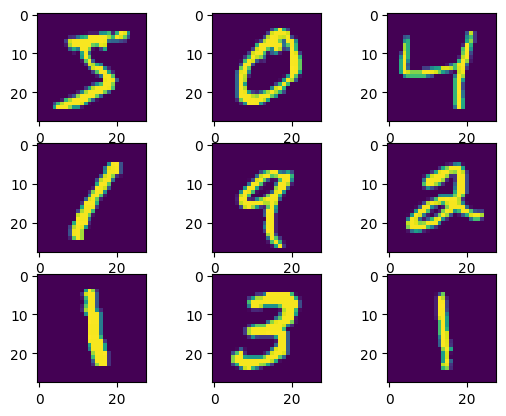

In [ ]:
(xtrain, ytrain), (xtest, ytest) = load_data()

print(xtrain.shape)

xtrain = xtrain.reshape(60000, 28, 28, 1)
xtrain = xtrain.astype('float32')/255.

xtest = xtest.reshape(10000, 28, 28, 1)
xtest = xtest.astype('float32')/255.

ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

# create a grid of 3x3 images
for i in range(0, 9):
  plt.subplot(330 + 1 + i)
  plt.imshow(xtrain[i].reshape(28, 28))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convnet1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 convnet2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 convnet3 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 1, 1, 64)         

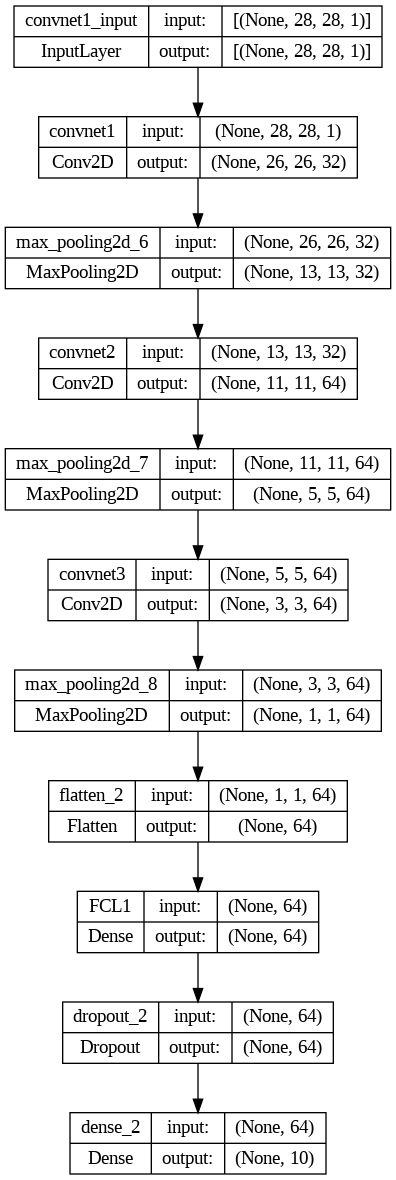

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='convnet1'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', name='convnet2'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', name='convnet3'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu', name='FCL1'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
plot_model(model, to_file='MNIST_CNN.png', show_shapes=True, show_layer_names=True)

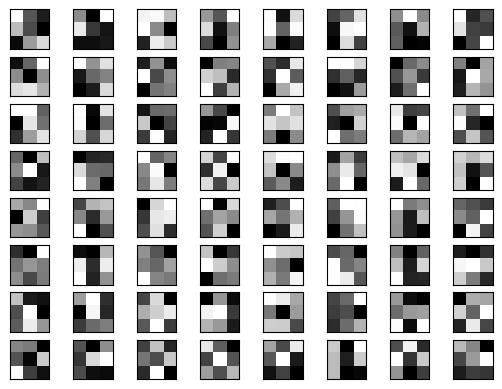

In [ ]:
# specify layer
layer = 2
rows = 8
cols = 8
filters, biases = model.layers[layer].get_weights()
f_min, f_max = filters.min(), filters.max()
#filters = (filters - f_min)/(f_max - f_min)

# plot first few filters
n_filters, ix = rows,1
for i in range(n_filters):
  # get filter
  f = filters[:,:,:,i]
  for j in range(cols):
    ax = plt.subplot(n_filters, cols, ix)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.imshow(f[:,:,j],cmap="gray")
    ix+=1

plt.show()

Epoch 1/5
750/750 [==============================] - 46s 60ms/step - loss: 0.5341 - accuracy: 0.8324 - val_loss: 0.1313 - val_accuracy: 0.9600
Epoch 2/5
750/750 [==============================] - 44s 59ms/step - loss: 0.1755 - accuracy: 0.9501 - val_loss: 0.0791 - val_accuracy: 0.9774
Epoch 3/5
750/750 [==============================] - 44s 59ms/step - loss: 0.1226 - accuracy: 0.9663 - val_loss: 0.0751 - val_accuracy: 0.9781
Epoch 4/5
750/750 [==============================] - 49s 66ms/step - loss: 0.0962 - accuracy: 0.9739 - val_loss: 0.0561 - val_accuracy: 0.9831
Epoch 5/5
750/750 [==============================] - 45s 60ms/step - loss: 0.0788 - accuracy: 0.9784 - val_loss: 0.0526 - val_accuracy: 0.9850
Accuracy: 98.51%
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
0.20144483596086502
Training and validation loss    :  0.20144483596086502 0.07883265316486358
Training and validation accuracy:  0.9402250051498413 0.9767166614532471
313/313 [==============================]

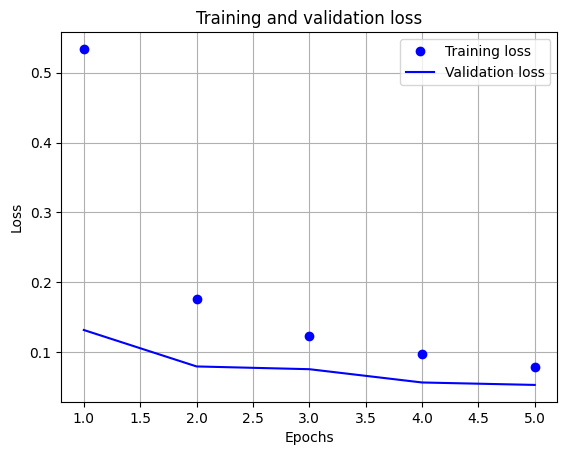

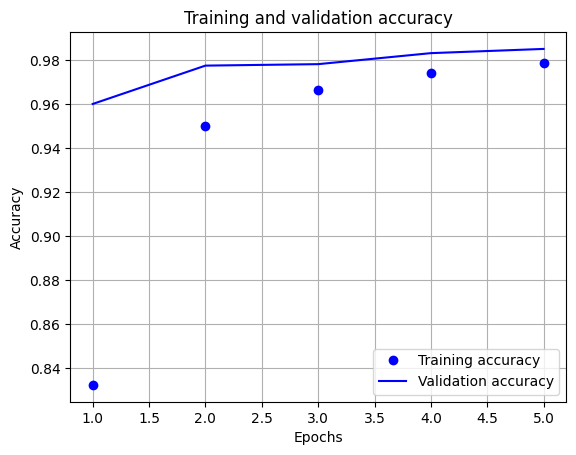

In [ ]:
# To get reproducible results in keras
np.random.seed(1)

history = model.fit(xtrain, ytrain, epochs=5, batch_size=64, verbose=1, validation_split=0.2)

# Final evaluation of the model
scores = model.evaluate(xtest, ytest, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# plot loss and accuracy
print(history.history.keys())
loss = history.history['loss']
print(np.mean(loss))
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

print('Training and validation loss    : ', np.mean(loss), np.mean(val_loss))
print('Training and validation accuracy: ', np.mean(accuracy), np.mean(val_accuracy))

y_pred = model.predict(xtest)
score = model.evaluate(xtest, ytest)
print('accuracy :', score)

epochs = range(1, len(loss)+1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

In [ ]:
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 convnet1 (None, 26, 26, 32)
1 max_pooling2d (None, 13, 13, 32)
2 convnet2 (None, 11, 11, 64)
3 max_pooling2d_1 (None, 5, 5, 64)
4 convnet3 (None, 3, 3, 64)
5 max_pooling2d_2 (None, 1, 1, 64)
6 flatten (None, 64)
7 FCL1 (None, 64)
8 dropout (None, 64)
9 dense (None, 10)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convnet1_input (InputLayer  [(None, 28, 28, 1)]       0         
 )                                                               
                                                                 
 convnet1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 convnet2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                             

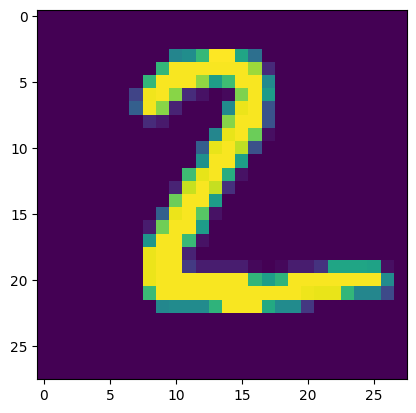

1/1 [==============================] - 0s 71ms/step
(1, 3, 3, 64)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


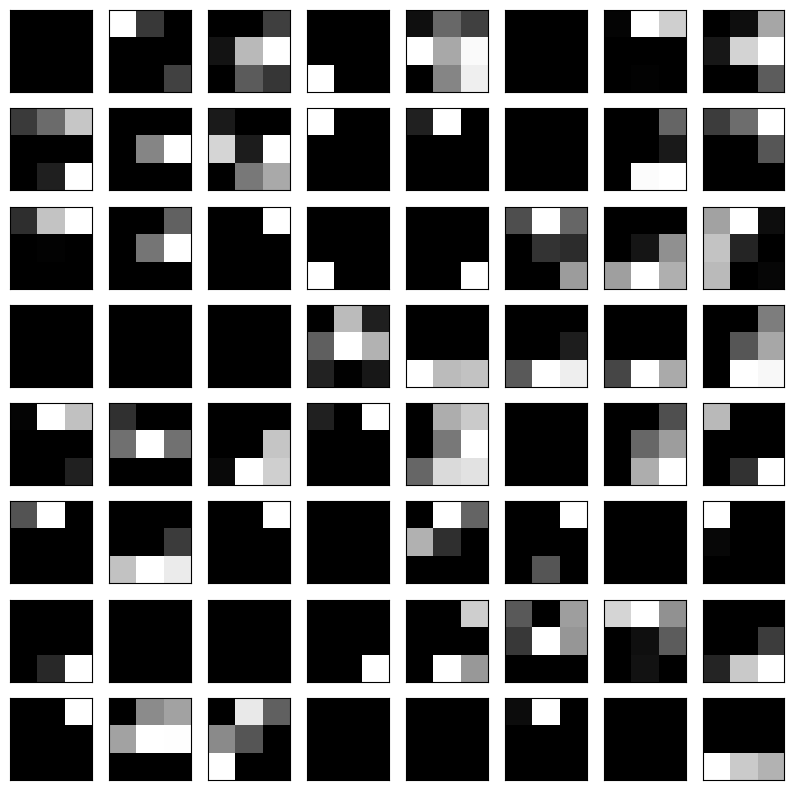

In [ ]:
# display feature maps of convnet3
sub_model = Model(inputs = model.input, outputs = model.layers[4].output)
sub_model.summary()
plot_model(sub_model, to_file='MNIST_conv_layers.png', show_shapes=True, show_layer_names=True)

# convert the image to an array
img = xtest[1]

print(img.shape)

img = np.expand_dims(img, axis=0)
print(img.shape)

plt.figure()
plt.imshow(img.reshape(28,28))
plt.show()

feature_maps = sub_model.predict(img)

print(feature_maps.shape)

print(feature_maps[0,:,:,0])

# create a grid of 8x8 images
plt.figure(figsize=(10, 10))

for i in range(8*8):
    # display original
    ax = plt.subplot(8, 8, i + 1)
    #plt.imshow(features[0])
    plt.imshow(feature_maps[0, :, :, i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

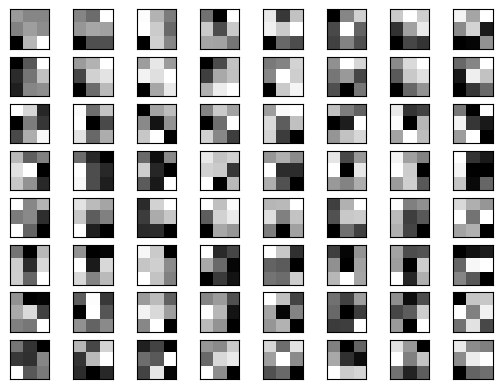

In [ ]:
# specify layer
layer = 2
rows = 8
cols = 8
filters, biases = model.layers[layer].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min)/(f_max - f_min)

# plot first few filters
n_filters, ix = rows,1
for i in range(n_filters):
  # get filter
  f = filters[:,:,:,i]
  for j in range(cols):
    ax = plt.subplot(n_filters, cols, ix)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.imshow(f[:,:,j],cmap="gray")
    ix+=1

plt.show()